# Proyecto Criptografía Holográfica para Firmas

## Dimensiones de mundo, longitud de onda y tamaño de pixel

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#definimos nuestras unidades
um = 1e-6
mm = 1e-3
cm = 1e-2
nm= 1e-9

w_length = 514*nm #definimos la longitud de onda
k0=2*np.pi/w_length 
dx=dy=15*um #definimos el tamaño de pixel con condiciones de mundo

## Firma a encriptar

1.0 0.0


<function matplotlib.pyplot.show(close=None, block=None)>

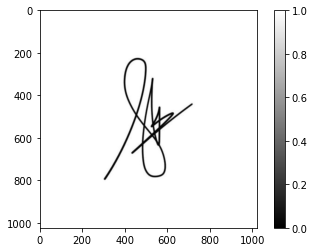

In [6]:
T = cv2.imread("firma.jpg",cv2.IMREAD_GRAYSCALE)
T = cv2.resize(T,(1024,1024), interpolation = cv2.INTER_AREA)
T= T/np.max(T)
No=T.shape[0]
print(np.max(T),np.min(T))
plt.figure()
plt.imshow(T,cmap="gray")
plt.colorbar()
plt.show

## Función de propagación en espacio libre

In [4]:
def prop(Uin,z,k,d1):
    
    N=Uin.shape[0]
    
    #Coordenadas en el plano de entrada
    x1,y1 = np.meshgrid( np.arange(-N/2.,N/2.) * d1,
                            np.arange(-N/2.,N/2.) * d1)
    
    
    h=np.exp(-1j*k*z)*np.exp(-1j*k*((x1**2)+(y1**2))/(2*z))
    
    padx=h.shape[0]*2
    pady=h.shape[1]*2
      

    H=np.fft.fft2(h, s=[padx, pady])
    U=np.fft.fft2(Uin, s=[padx, pady])
    
    padx = int (N/2)
    pady = int (N/2)

    conv=U*H
    convo = np.fft.ifft2(conv)
    
    convo = convo[padx:padx+N,pady:pady+N]
    
    convo=convo/np.max(np.abs(convo))
    
    
    
    return convo    
    

# Procedimiento

### Encriptación 

Se hace la primer propagación de la transmitancia de entrada (firma) hasta la llave de encriptación (LCR 2500), ubicada a 60 cm de distancia

<function matplotlib.pyplot.show(close=None, block=None)>

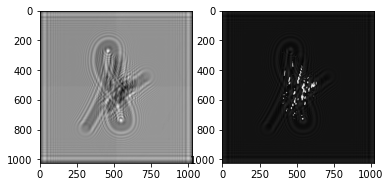

In [5]:
z1=prop(T,60*cm,k0,dx)

phase_spectrum=np.angle(np.fft.fft2(z1))

ax1 = plt.subplot(1,2,1)
ax1.imshow(np.abs(z1), cmap='gray')

ax2 = plt.subplot(1,2,2)
ax2.imshow(np.angle(z1), cmap='gray')

plt.show

Se genera una llave de fase aleatoria del mismo tamaño de la imagen y se multiplica con la imagen propagada

<function matplotlib.pyplot.show(close=None, block=None)>

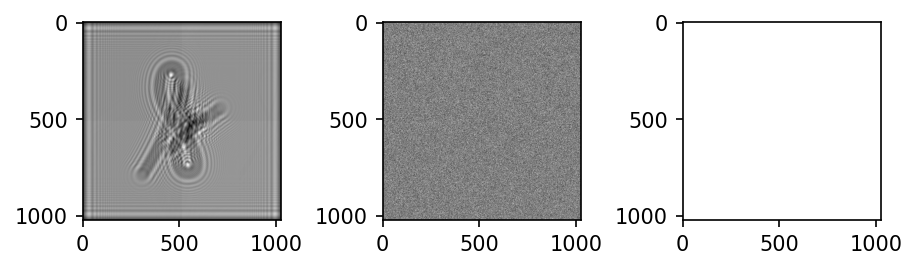

In [8]:
Key=np.exp(1j*2*np.pi*(np.random.normal(0, 1, (1024,1024))))

K=z1*Key


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,constrained_layout=True,dpi=150)
ax1 = plt.subplot(1,3,1)
ax1.imshow(np.abs(K), cmap='gray')

ax2 = plt.subplot(1,3,2)
ax2.imshow(np.angle(K), cmap='gray')

ax3 = plt.subplot(1,3,3)
ax3.imshow(np.abs(Key), cmap='gray')
plt.show

Se propaga nuevamente la imagen con la nueva fase, hasta el plano del cristal holográfico

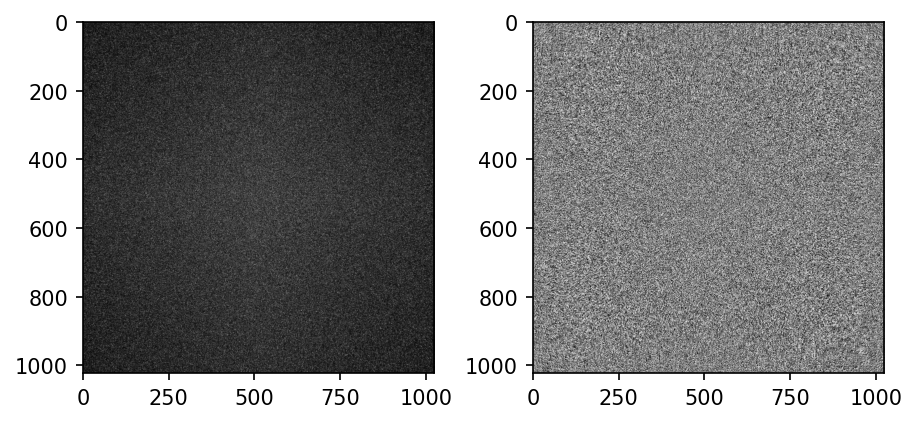

In [10]:
z2=prop(K,60*cm,k0,dx)

fig, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True,dpi=150)
ax1 = plt.subplot(1,2,1)
ax1.imshow(np.abs(z2), cmap='gray')

ax2 = plt.subplot(1,2,2)
ax2.imshow(np.angle(z2), cmap='gray')

Se plasma el holograma de la firma encriptada en el cristal BSO.

### Desencriptado

Popagamos en sentido contrario la imagen del holograma. Se compara con el resultado en el proceso de encriptado

<function matplotlib.pyplot.show(close=None, block=None)>

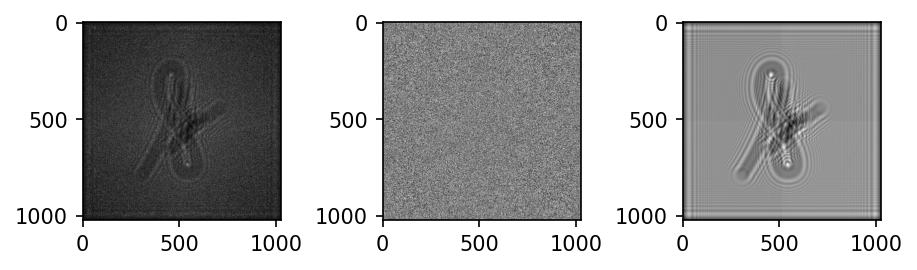

In [13]:
z3=prop(z2,-60*cm,k0,dx)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,constrained_layout=True,dpi=150)
ax1 = plt.subplot(1,3,1)
ax1.imshow(np.abs(z3), cmap='gray')

ax2 = plt.subplot(1,3,2)
ax2.imshow(np.angle(z3), cmap='gray')

ax3 = plt.subplot(1,3,3)
ax3.imshow(np.abs(K), cmap='gray')
plt.show

Se multiplica por el conjugado de la llave utilizada. Por último se propaga nuevamente y se obtiene la reconstrucción de la firma.

<function matplotlib.pyplot.show(close=None, block=None)>

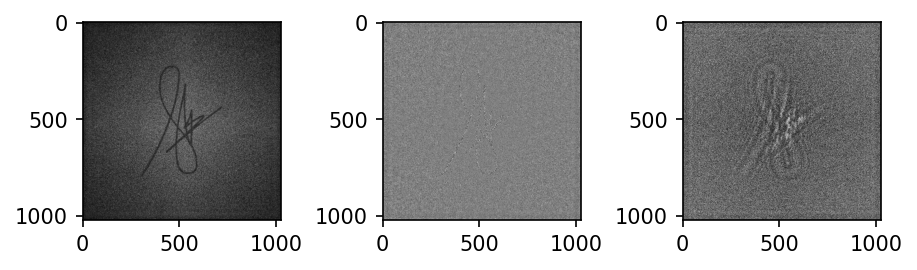

In [15]:
Dec=z3*np.conjugate(Key)

z4=prop(Dec,-60*cm,k0,dx)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,constrained_layout=True,dpi=150)
ax1 = plt.subplot(1,3,1)
ax1.imshow(np.abs(z4), cmap='gray')

ax2 = plt.subplot(1,3,2)
ax2.imshow(np.angle(z4), cmap='gray')

ax3 = plt.subplot(1,3,3)
ax3.imshow(np.angle(Dec), cmap='gray')
plt.show